Adding polynomial features
---

In [1]:
import pandas as pd

# Load the data
data_df = pd.read_csv('electric-cars.csv')

# Print shape
print('Shape:', data_df.shape)

# First five rows
data_df.head()

Shape: (57, 2)


,Temperature [°F],Energy Consumption [Wh/mil]
0,-15,460
1,-12,398
2,-8,460
3,-7,540
4,-6,347


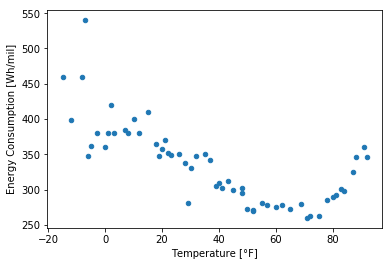

In [2]:
# Extract x, y data
x = data_df.iloc[:, 0].values # Temperatures
y = data_df.iloc[:, 1].values # Consumption

# Plot data
%matplotlib inline
import matplotlib.pyplot as plt

data_df.plot.scatter('Temperature [°F]', 'Energy Consumption [Wh/mil]')
plt.show()

In [3]:
from sklearn.preprocessing import PolynomialFeatures

In [4]:
import numpy as np

# Create the object
pf_obj = PolynomialFeatures(degree=2)

## all in one step
# Create the polynomial features
X2 = pf_obj.fit_transform(
    # Pass two dimensional array
    x[:, np.newaxis] # (57,) -> (57,1)
)

print('Shape:', X2.shape)

Shape: (57, 3)


In [5]:
# Alternative in two steps
# Fit the preprocessor
pf_obj.fit(x[:, np.newaxis])

# Create the polynomial features
X2 = pf_obj.transform((x[:, np.newaxis]))

In [6]:
# Get feature names
feature_names = pf_obj.get_feature_names()

print('Features:', feature_names)

Features: ['1', 'x0', 'x0^2']


In [7]:
# Create the object
pf_obj = PolynomialFeatures(degree=2, include_bias=False) # include_bias if we don't want the intercept term (like for
                                                          # example the LinearReregssion object)

# Create the polynomial features
X2 = pf_obj.fit_transform(x[:, np.newaxis])

# Get feature names
feature_names = pf_obj.get_feature_names()

print('Features:', feature_names)

Features: ['x0', 'x0^2']


In [8]:
# Create the polynomial features manually
X2 = np.c_[x, x**2]

In [9]:
from sklearn.linear_model import LinearRegression

# Create linear regression
linreg = LinearRegression()

# Fit it
linreg.fit(X2, y);

In [10]:
# Generate a hundred values between min(x) and max(x)
x_values = np.linspace(min(x), max(x), num=50)
X_values2 = pf_obj.transform(x_values[:, np.newaxis])

In [11]:
# alternatives manually
X_values2 = np.c_[x_values, x_values**2]

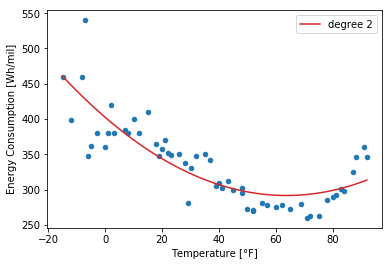

In [12]:
# Compute predictions
y_values = linreg.predict(X_values2)

# Plot predictions
data_df.plot.scatter('Temperature [°F]', 'Energy Consumption [Wh/mil]')
plt.plot(x_values, y_values, color='C3', label= "degree 2")
plt.legend()
plt.show()

## Exercise with degrees 3,5 and 5 

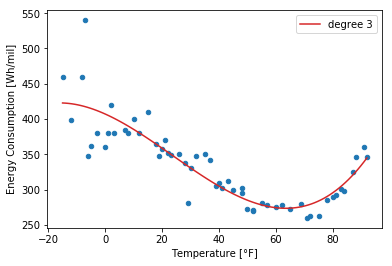

In [13]:
# Create the object
pf_obj = PolynomialFeatures(degree=3, include_bias=False)
# Create the polynomial features
X3 = pf_obj.fit_transform(x[:, np.newaxis])

# Create linear regression
linreg = LinearRegression()
# Fit it
linreg.fit(X3, y);

# Generate a hundred values between min(x) and max(x)
X_values3 = pf_obj.transform(x_values[:, np.newaxis])
# Compute predictions
y_values = linreg.predict(X_values3)

# Plot predictions
data_df.plot.scatter('Temperature [°F]', 'Energy Consumption [Wh/mil]')
plt.plot(x_values, y_values, color='C3', label= "degree 3")
plt.legend()
plt.show()

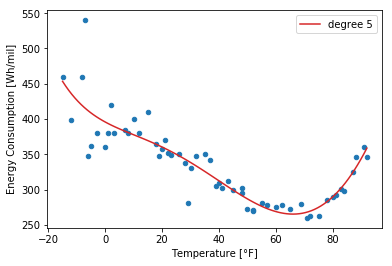

In [14]:
# Create the object
pf_obj = PolynomialFeatures(degree=5, include_bias=False)
# Create the polynomial features
X5 = pf_obj.fit_transform(x[:, np.newaxis])

# Create linear regression
linreg = LinearRegression()
# Fit it
linreg.fit(X5, y);

# Generate a hundred values between min(x) and max(x)
X_values5 = pf_obj.transform(x_values[:, np.newaxis])
# Compute predictions
y_values = linreg.predict(X_values5)

# Plot predictions
data_df.plot.scatter('Temperature [°F]', 'Energy Consumption [Wh/mil]')
plt.plot(x_values, y_values, color='C3', label= "degree 5")
plt.legend()
plt.show()

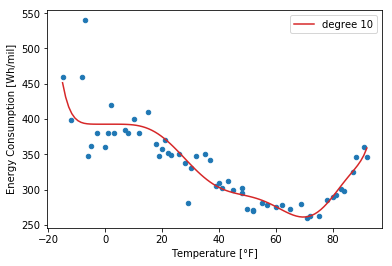

In [15]:
# Create the object
pf_obj = PolynomialFeatures(degree=10, include_bias=False)
# Create the polynomial features
X10 = pf_obj.fit_transform(x[:, np.newaxis])

# Create linear regression
linreg = LinearRegression()
# Fit it
linreg.fit(X10, y);

# Generate a hundred values between min(x) and max(x)
X_values10 = pf_obj.transform(x_values[:, np.newaxis])
# Compute predictions
y_values = linreg.predict(X_values10)

# Plot predictions
data_df.plot.scatter('Temperature [°F]', 'Energy Consumption [Wh/mil]')
plt.plot(x_values, y_values, color='C3', label= "degree 10")
plt.legend()
plt.show()

Additional info
---

Data adapted from [this paper][paper-link] - Effects of Regional Temperature on Electric Vehicle Efficiency, Range, and Emissions in the United States.

[paper-link]:http://pubs.acs.org/doi/abs/5.521/es505621s